## Predicting sales values from advertising expenditure

In [18]:
import pandas as pd

In [19]:
import numpy as np

In [21]:
sales_df = pd.read_csv('advertising_and_sales_clean.csv')
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [17]:
sales_df.corr()['sales']

tv              0.999497
radio           0.868638
social_media    0.527446
sales           1.000000
Name: sales, dtype: float64

Creating features

In [4]:
# Create y from the radio column's values
x = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values
 
# Reshape x
x = x.reshape(-1, 1)

# Check the shape of the features and targets
print(x.shape, y.shape)

(4546, 1) (4546,)


Building a linear regression model

Training the linear regression model on all feature and target from created array. The goal is to assess the relationship between the feature and target values, thus no need for splitting the data into training and test sets.

In [5]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(x, y)

# Make predictions
predictions = reg.predict(x)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


Visualizing a Linear regression model

Visualizing how well the model fits the data and interpret the relationship between radio advertising expenditure and sales

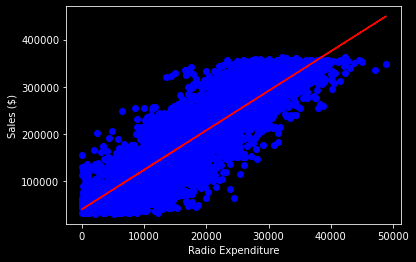

In [6]:
# Import matplotlib.pyplot 
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(x, y, color="blue")

# Create line plot
plt.plot(x, predictions, color="red")
plt.xlabel("Radio Expenditure")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

Fit and predict for regression

In [8]:
# Create x and y arrays
x = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

# Import module
from sklearn.model_selection import train_test_split

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(x_train, y_train)

# Make prediction
y_pred = reg.predict(x_test)

print("Prediction: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Prediction: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


Regression performance

In [9]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(x_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.433199600101


Cross-validation for R-squared

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In [10]:
# Create x and y arrays
x = sales_df.drop(["tv", "sales","influencer"], axis=1).values
y = sales_df["sales"].values

# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, x, y, cv=kf)

# Print scores
print(cv_scores)

[0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]


Notice how R-squared for each fold ranged between 0.74 and 0.77? By using cross-validation, we can see how performance varies depending on how the data is split!

Analyzing cross-validation metrics

In [11]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.7536937414361207
0.012305389070474725
[0.74141863 0.77191916]


An average score of 0.75 with a low standard deviation is pretty good for a model out of the box! Now let's learn how to apply regularization to our regression models.

### Regularized regression

Why regularize?

Recall that fitting a linear regression model minimizes a loss function to choose a coefficient, a, for each feature, and the intercept, b. If we allow these coefficients to be very large, we can get overfitting. Therefore, it is common practice to alter the loss function so that it penalizes large coefficients. This is called regularization.

Ridge regression

The first type of regularized regression that we'll look at is called ridge. With ridge, we use the Ordinary Least Squares loss function plus the squared value of each coefficient, multiplied by a constant, alpha. So, when minimizing the loss function, models are penalized for coefficients with large positive or negative values. When using ridge, we need to choose the alpha value in order to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha for ridge is similar to picking k in KNN. Alpha in ridge is known as a hyperparameter, which is a variable used for selecting a model's parameters. Alpha controls model complexity. When alpha equals zero, we are performing OLS, where large coefficients are not penalized and overfitting may occur. A high alpha means that large coefficients are significantly penalized, which can lead to underfitting.

In [12]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

for alpha in alphas:
    
    # Create a Ridge regression model
    ridge = Ridge(alpha=alpha)
    
    # Fit the data
    ridge.fit(x_train, y_train)
    
    # Obtain R-squared
    score = ridge.predict(x_test)
    ridge_scores.append(ridge.score(x_test, y_test))
print(ridge_scores)


[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

### Lasso regression for feature importance

lasso regression can be used to identify important features in a dataset.
Fit a lasso regression model to the sales_df data and plot the model's coefficients.

Lasso regression for feature selection 
* Lasso can select important features of a dataset
* Shrinks the coeffcients of less important features to zero
* Features not shrunk to zero are selected by lasso


In [13]:
# Lasso regression in scikit-learn
# Import Lasso
from sklearn.linear_model import Lasso
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
lasso_scores = []

for alpha in alphas:
    
    # Create a Lasso regression model
    lasso = Lasso(alpha=alpha)
    
    # Fit the data
    lasso.fit(x_train, y_train)
    
    # Obtain R-squared
    score = lasso.predict(x_test)
    lasso_scores.append(lasso.score(x_test, y_test))
print(lasso_scores)


[0.9990152104790647, 0.9990152105072273, 0.9990152107889495, 0.9990152136067459, 0.9990152417537391, 0.999015518361682]


[ 3.56256962 -0.00397035  0.00496385]


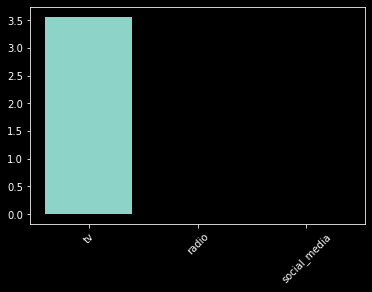

In [14]:
# Lasso regression for feature importance
# Create x and y arrays
x = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

# Import Lasso
from sklearn.linear_model import Lasso

sales_columns = sales_df.drop(["sales", "influencer"], axis=1).columns

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(x, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()


See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! In the next chapter, we will learn how to further assess and improve our model's performance!